# Init

In [3]:
# Connect gdrive
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import keras

In [8]:
import analysis

In [9]:
Mdir = "/content/gdrive/My Drive/Colab Notebooks/"

In [18]:
# Loading saved stochastic predictions
predDir = "mcPredExp1.npy"
mcPred = np.load(Mdir + predDir)

In [19]:
mcPred.shape

(500, 6289, 3)

In [ ]:
#sequential dataset
dataDir = "Datasets/YawDD dataset/vids2.csv"
data = pd.read_csv(Mdir + dataDir)

In [12]:
#image dataset
dataDir = "Datasets/YawDD dataset/pics.csv"
data = pd.read_csv(Mdir + dataDir)

In [16]:
data.shape

(7861, 2)

In [21]:
# getting same split used during training, to get y_test. 
num_classes = 3
y = data['class']
y = keras.utils.to_categorical(y, num_classes)
X = y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.8, shuffle = False)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.8, stratify = y)

In [23]:
y_test.shape

(6289, 3)

In [24]:
yTrue = y_test.argmax(axis = 1)
# mc_ensemble_pred = mcPred.mean(axis=0).argmax(axis=1)

In [25]:
from sklearn.metrics import accuracy_score
mc_ensemble_pred = mcPred.mean(axis=0).argmax(axis=1)
ensemble_acc = accuracy_score(y_test.argmax(axis=1), mc_ensemble_pred)
print("MC-ensemble accuracy: {:.1%}".format(ensemble_acc))

MC-ensemble accuracy: 78.0%


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yTrue, mc_ensemble_pred)

array([[1369,  358,  118],
       [ 263, 2309,  224],
       [ 136,  282, 1230]])

# Variation Ratio

In [27]:
_, vr = analysis.cal_var_ratio(mcPred)
stats1 = vr[0]

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


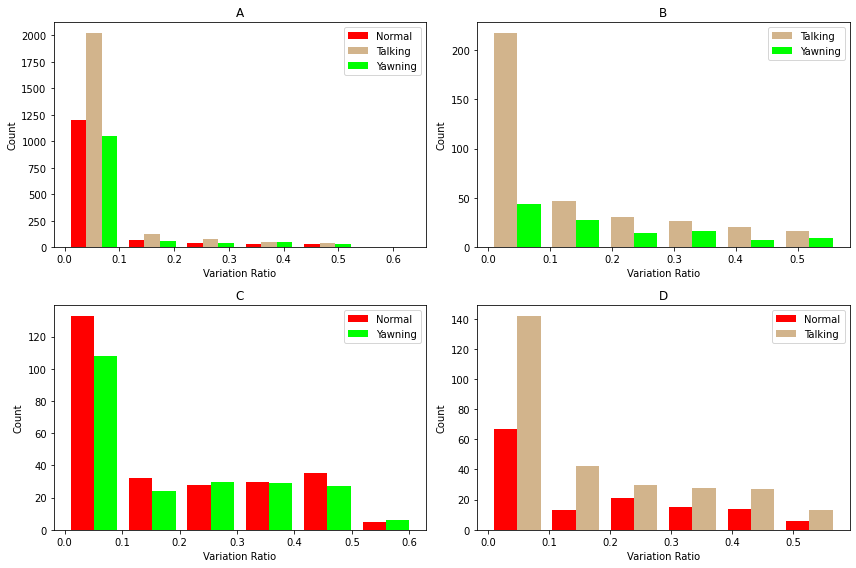

In [28]:
# stats broken in meaning categories
trL, flL = analysis.get_stats(yTrue, mc_ensemble_pred, stats1)
xLabel = 'Variation Ratio'
fig = analysis.createPlot(trL, flL, xLabel, n_bins=6)

# Predictive Entropy

In [ ]:
imDir = 'unc1_3.pdf'
fig.savefig(Mdir + imDir, dpi=300)

In [29]:
stats2 = analysis.cal_pred_entropy(mcPred)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


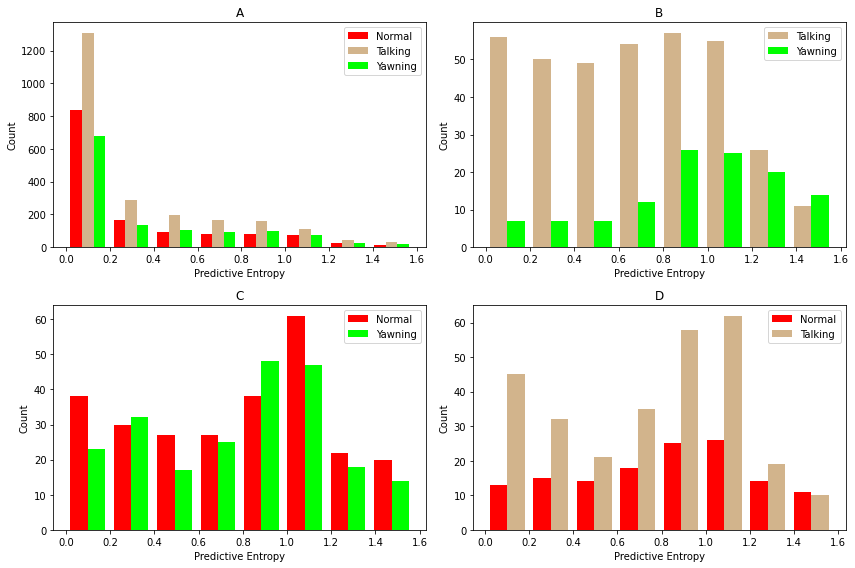

In [30]:
trL1, frL1 = analysis.get_stats(yTrue, mc_ensemble_pred, stats2)
xLabel = 'Predictive Entropy'
fig1 = analysis.createPlot(trL1, frL1, xLabel, n_bins=8)

# Mutual Information

In [31]:
stats3 = analysis.cal_mutual_info(mcPred)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


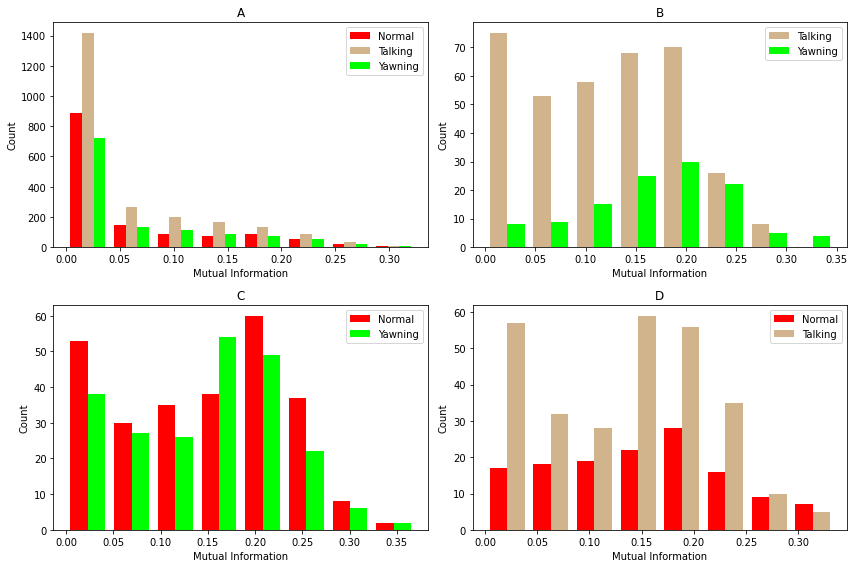

In [32]:
trL2, frL2 = analysis.get_stats(yTrue, mc_ensemble_pred, stats3)
xLabel = 'Mutual Information'
fig2 = analysis.createPlot(trL2, frL2, xLabel, n_bins=8)

# Analysis

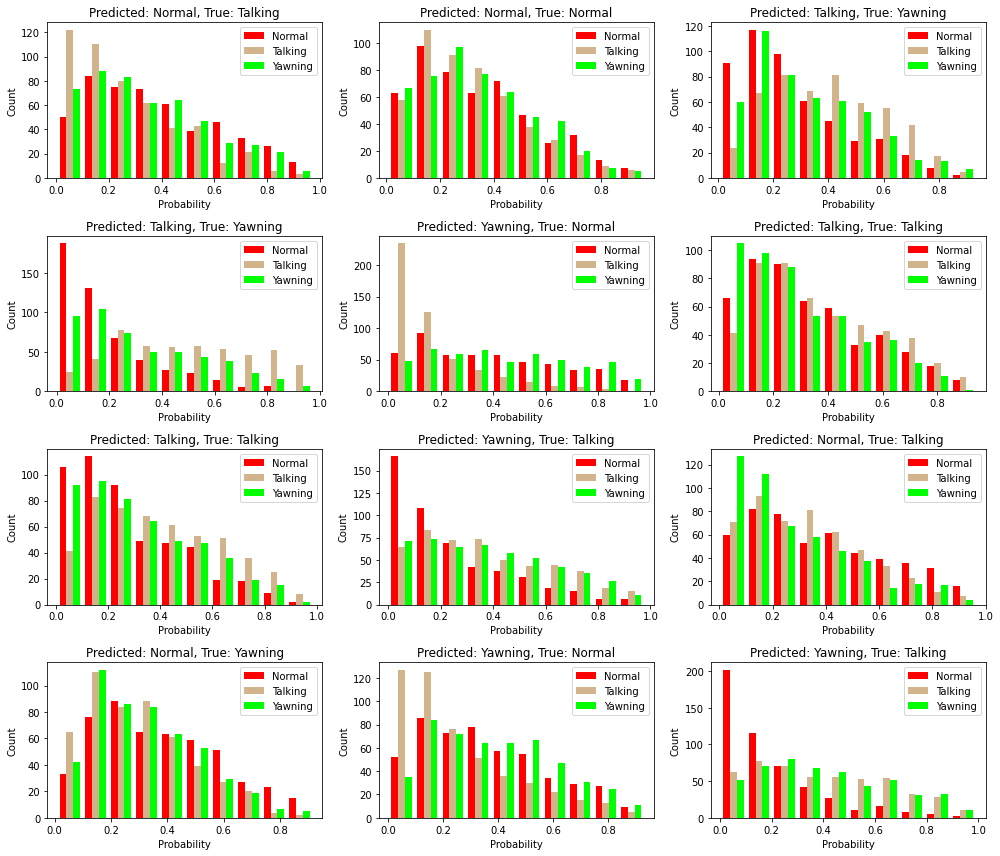

In [33]:
# incorrect prediction with high uncertainty
figG, cts = analysis.plot_highUnc(stats2, stats3, mcPred, yTrue, mc_ensemble_pred, n_bins=10)

In [ ]:
# load input data and rerun the split
Xdir = "vid2.npy"
X = np.load(Mdir + Xdir)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21356, test_size=0.6, shuffle = False)

In [ ]:
# load input data and rerun the split
Xdir = "X.npy"
X = np.load(Mdir + Xdir)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.8, stratify = y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.8, stratify = y)

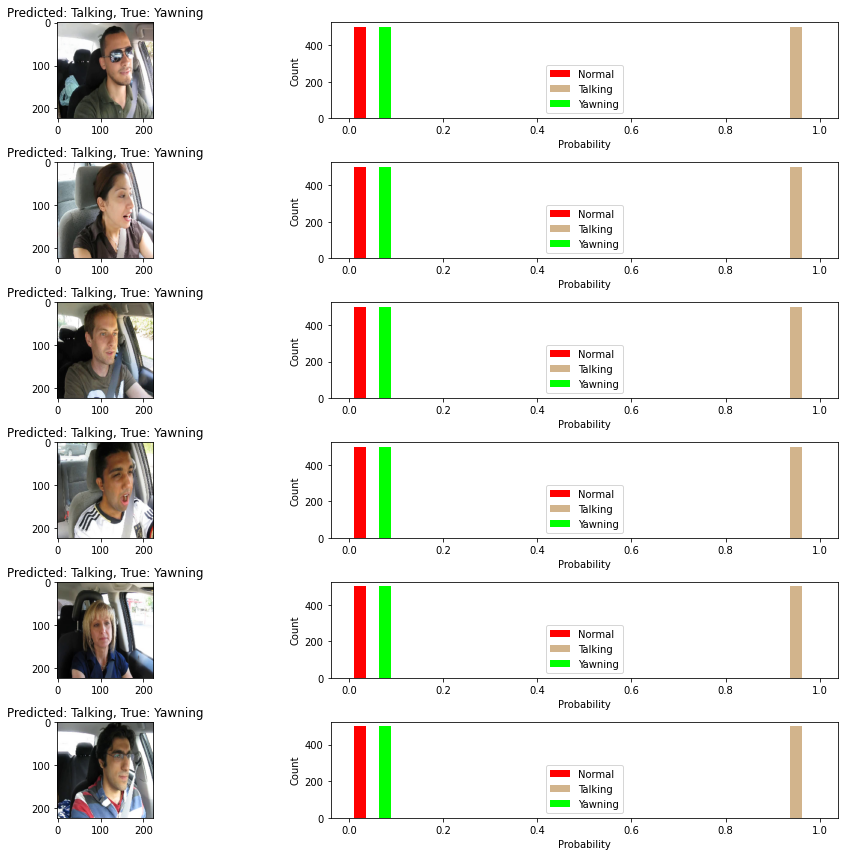

In [36]:
# Plot correct and incorrect inputs with high confidence
fig2 = analysis.plot_incorrect(stats2, mcPred, yTrue, mc_ensemble_pred,X_test, n_bins = 10, leave=6, datasetType='multi')

Examples of incorrectly labelled dataset leading to high confidence incorrect prediction.

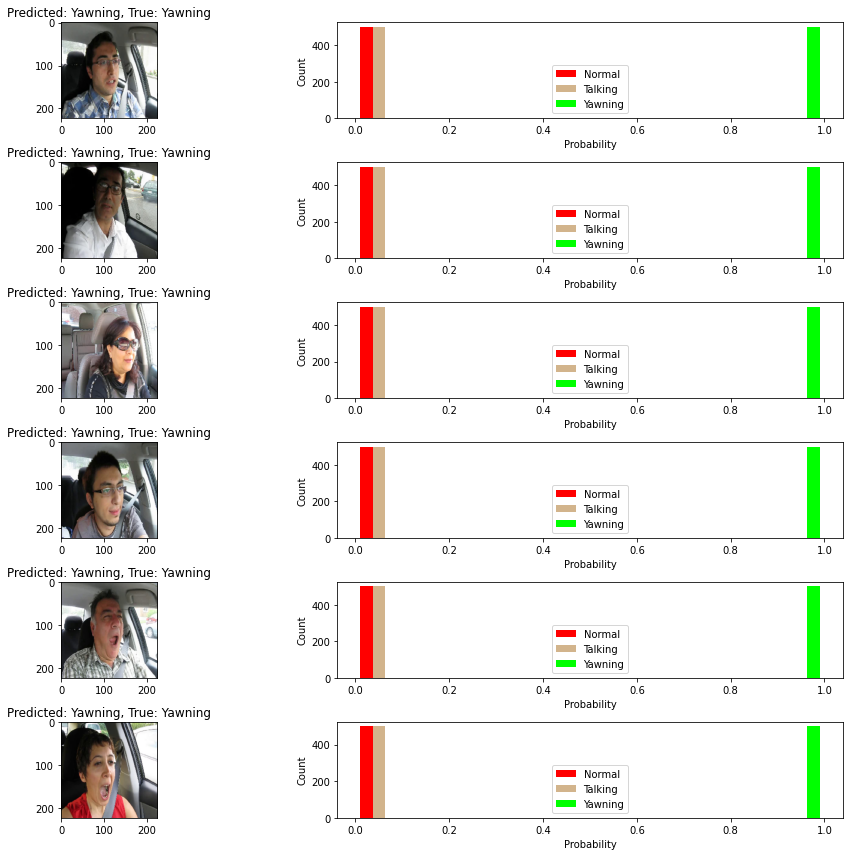

In [37]:
fig2 = analysis.plot_correct(stats2, mcPred, yTrue, mc_ensemble_pred,X_test, n_bins = 10, leave=6, datasetType='multi')

We will try to develop a deeper understanding of uncertainty metrics, before analysing the results.
This will help in getting a clearer picture of the analysis of models’ predictions. The values
of these metrics are dependent upon the number of classes in the prediction, so we will analyse
with three classes.For Variation Ratio(VR), we can loosely say that
it is the probability that the model predicts a different class than the mode class. So clearly, this
value maximises when each class has equal probability(uniformly distributed), which in our case
is: 1-1/3 = 0:66. Predictive Entropy(PE) is based on Entropy from Information
Theory. We can understand this as randomness(entropy) in our information(prediction). Again,
uniformly distributed prediction probability will maximise this measure, at the value of log 3.
These prediction probabilities can be from softmax outputs like {[0.33, 0.33, 0.33], [0.33, 0.33,
0.33] ...} or {[1, 0, 0], [0, 1, 0 ], [0, 0, 1] ...}. Later prediction is much worse in terms of model uncertainty
and we would certainly want to differentiate between them. The first type of predictions
can be termed as high ’Prediction Uncertainty’ while second as high ’Model Uncertainty’(Gal,
2016). Mutual Information(MI) between prediction and posterior allows us to do
that. Informally, we can say that the second term is a reward term, which decreases the PE(first
term), thus rewarding outputs with high predictive uncertainty for correctly predicting it. Predictions
with high confidence([1, 0, 0]), but overall having high uncertainty will not be rewarded.
Thus high PE, but lower MI indicates that probability values are spread over multiple points in the
predictions. The maximum value for both PE and MI will depend upon the number of prediction
classes and clearly on the base of the logarithm function. The previous text has not commented
upon maximum values in their experiments. We have used base 2 in logarithm function because
bits as the unit feels better. For example softmax output like {[0, 0.5, 0.5], [0, 0.5, 0.5] ....}, here
model is pretty certain about non-possibility of occurrence of first-class but uncertain about other
two. PE of 1 bit gives a good intuition about this situation. The maximum value for both PE and
MI is 1.6 bits.

First thing to notice from uncertainty metric is the low
uncertainty values in sub-sub-figures ’A’ of all sub-figures. These figures show the spread of uncertainty when the prediction is correct. This shows that model is confident about its correct prediction, which, in turn, indicates that we may be able to trust the accuracy score of the model.
Although this could also mean that this data was very similar to training data and so it will surely have low variance around known data. ’B’, ’C’, ’D’ show PE and MI values when prediction is incorrect. Higher PE values compared to MI shows that there were no extreme model uncertainty cases. ’B’ and ’D’ have a higher count of model classifying as ’Talking’ when the correct prediction is ’Normal’ and ’Yawning’ respectively. This bias towards ’Talking’
can also be seen from the confusion matrix. But, uncertainty values are equally distributed for all classes and cannot be used to distinguish between the classes. 
The uncertainty values also highlight the mislabelling problem. Probabilistic
Models will have a low uncertainty near the training data points. So, we can argue that when the model’s prediction is false with near-zero uncertainty, the labelling on test set or training set must be incorrect. Figures shows some incorrect predictions with high confidence.
We further analyse the correct low uncertainty predictions we can see that there are many pictures with no ’Yawning’ mouth position but labelled as ’Yawning’. The most probable reason for this behaviour is that model must have encountered frames with the same driver labelled as ’Yawning’ with ’Normal’ and ’Talking’ mouth position.